In [2]:
import pandas as pd
a=pd.read_json('.\Yelp_dataset_checkin_clean.json')
b = pd.read_json('Yelp_dataset_review_clean.json')
c = pd.read_json('Yelp_dataset_business_clean.json')


In [3]:
import matplotlib.pyplot as plt

In [11]:
attribute = c['attributes']
star = c['stars']

In [12]:
num=0
good = 0
bad = 0
goodstar=0
badstar = 0
for i,v in attribute.items():
    if 'GoodForKids' in v:
        if v['GoodForKids']=='True':
            good+=1
            goodstar+=star[i]
        else:
            bad+=1
            badstar+=star[i]

In [19]:
print(attribute[8].keys())

dict_keys(['RestaurantsAttire', 'RestaurantsTakeOut', 'BusinessAcceptsCreditCards', 'NoiseLevel', 'GoodForKids', 'RestaurantsReservations', 'RestaurantsGoodForGroups', 'BusinessParking', 'RestaurantsPriceRange2', 'HasTV', 'Alcohol', 'BikeParking', 'RestaurantsDelivery', 'ByAppointmentOnly', 'OutdoorSeating'])


In [13]:
good_tv = 0
bad_tv = 0
goodstar_tv=0
badstar_tv = 0
for i,v in attribute.items():
    if 'HasTV' in v:
        if v['HasTV']=='True':
            good_tv+=1
            goodstar_tv+=star[i]
        else:
            bad_tv+=1
            badstar_tv+=star[i]

In [84]:
goodstar_tv/good_tv

3.428986660139518

In [85]:
badstar_tv/bad_tv

3.7718912983804556

In [34]:
attribute[8]['NoiseLevel']

"u'quiet'"

In [14]:
noise = {}

for i,v in attribute.items():
    if 'NoiseLevel' in v:
        if v['NoiseLevel'].startswith('u'):
            if v['NoiseLevel'][2:-1] in noise:
                noise[v['NoiseLevel'][2:-1]]+=star[i]
                noise[v['NoiseLevel'][2:-1]+'_count']+=1
            else:
                noise[v['NoiseLevel'][2:-1]]=star[i]
                noise[v['NoiseLevel'][2:-1]+'_count']=1
        else:
            if v['NoiseLevel'][1:-1] in noise:
                noise[v['NoiseLevel'][1:-1]]+=star[i]
                noise[v['NoiseLevel'][1:-1]+'_count']+=1
            else:
                noise[v['NoiseLevel'][1:-1]]=star[i]
                noise[v['NoiseLevel'][1:-1]+'_count']=1

In [70]:
noise

{'quiet': 9451.5,
 'quiet_count': 2688,
 'average': 44790.0,
 'average_count': 12593,
 'very_loud': 1004.5,
 'very_loud_count': 362,
 'loud': 3487.5,
 'loud_count': 1105,
 'on': 46.5,
 'on_count': 15}

In [15]:
num=0
good_g = 0
bad_g = 0
goodstar_g=0
badstar_g = 0
for i,v in attribute.items():
    if 'RestaurantsGoodForGroups' in v:
        if v['RestaurantsGoodForGroups']=='True':
            good_g+=1
            goodstar_g+=star[i]
        else:
            bad_g+=1
            badstar_g+=star[i]

In [56]:
goodstar_g/good_g

3.4640577376502386

In [54]:
badstar/bad

3.290794979079498

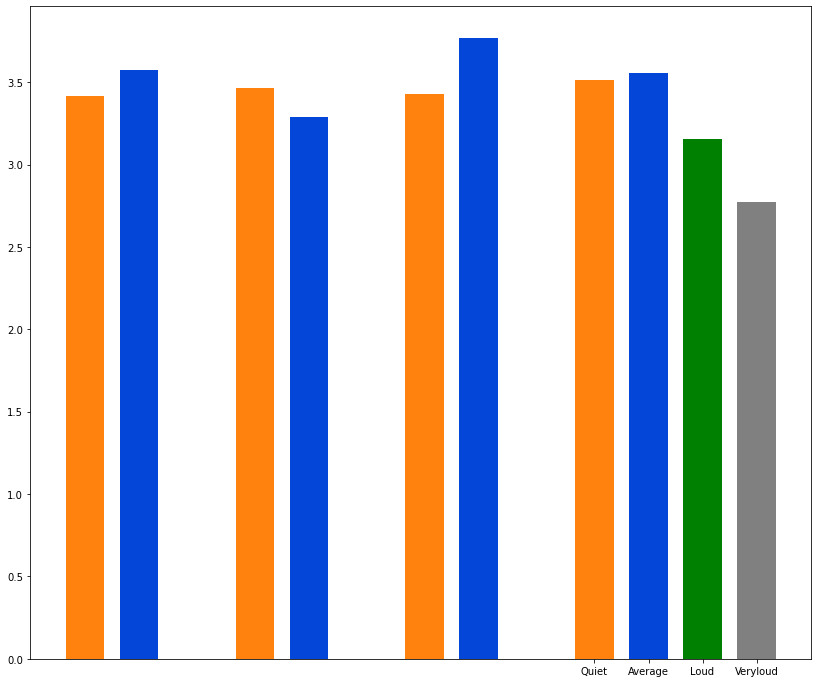

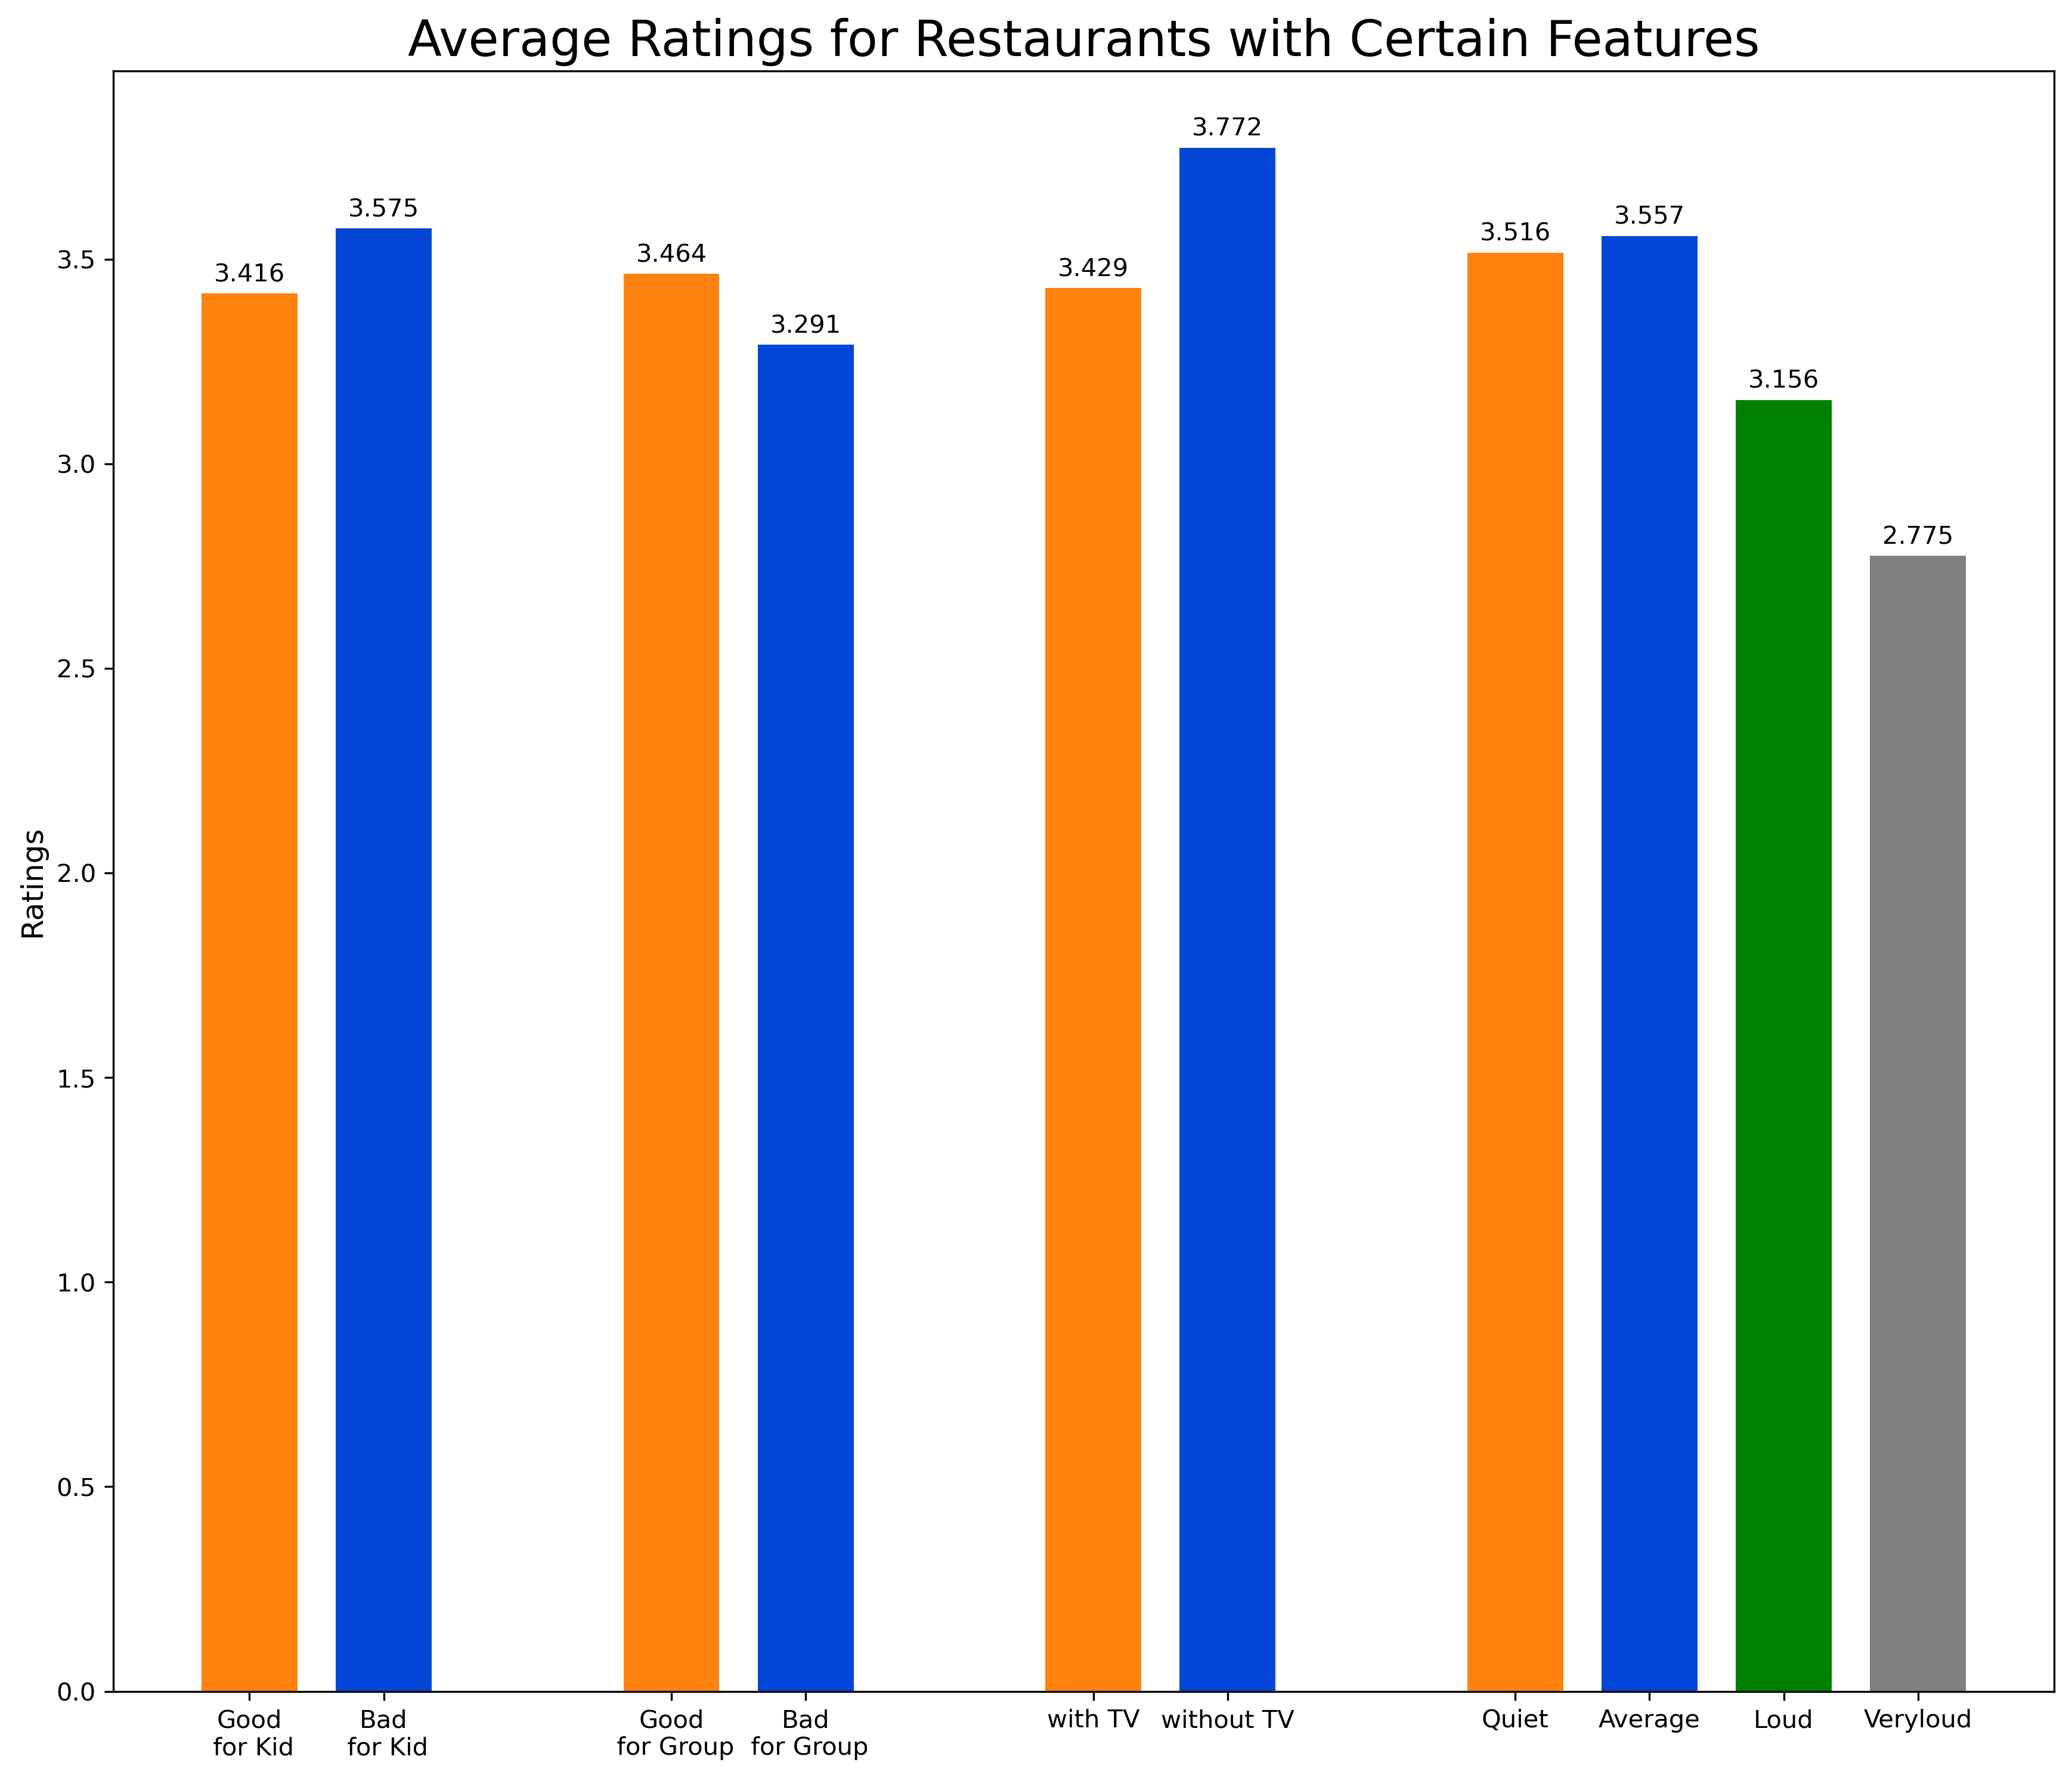

In [16]:

data_noise = [noise['quiet']/noise['quiet_count'],noise['average']/noise['average_count'],noise['loud']/noise['loud_count'],noise['very_loud']/noise['very_loud_count']]

data=[goodstar/good,badstar/bad,goodstar_g/good_g,badstar_g/bad_g, goodstar_tv/good_tv,badstar_tv/bad_tv,data_noise[0],data_noise[1],data_noise[2],data_noise[3]]
labels = ['Good\n for Kid', 'Bad\n for Kid', 'Good\n for Group', 'Bad\n for Group','with TV','without TV', 'Quiet','Average','Loud','Veryloud']
fig,ax = plt.subplots(figsize=(14,12), dpi=300)
locs = [0.3, 1, 2.5, 3.2 , 4.7,5.4, 6.9,7.6,8.3,9]
plt.bar(locs, data, width=0.5, tick_label = labels, color=['#ff820f','#0346d8', '#ff820f','#0346d8','#ff820f','#0346d8','#ff820f','#0346d8','green', 'grey'])
plt.ylabel('Ratings', fontsize=12)
plt.title('Average Ratings for Restaurants with Certain Features', fontsize=20)
locs
for i, v in enumerate(data):
    ax.text(locs[i], v + 0.03, str(round(v, 3)), color='black', ha='center')

In [75]:
data_noise

[3.5161830357142856,
 3.5567378702453745,
 3.1561085972850678,
 2.7748618784530388]

In [4]:
time = b['date']
month_yr = {}
for index,value in time.items():
  temp = value.strftime('%Y/%m')
  if temp in month_yr:
    month_yr[temp]+=1
  else:
    month_yr[temp]=1

In [5]:
ttt=[]
for i in month_yr:
    ttt.append(i)

In [6]:
import functools
def func(x,y):
    xx=int(x[:4])
    yy=int(y[:4])
    xxx=int(x[5:])
    yyy=int(y[5:])
    if xx<yy:
        return -1

    elif xx==yy:

        if xxx<yyy:
            return -1
        if xxx==yyy:
            return 0
        else:
            return 1
    else:

        return 1

tttt=sorted(ttt,key=functools.cmp_to_key(func))

In [7]:
time_count=[]
for i in tttt:
    time_count.append(month_yr[i])

In [8]:
tick=[]
a=2004
b=12
for i in range(30):
    if i%2==0:
        b=12
        tick.append(str(a)+'/'+str(b))
    else:
        b=6
        a+=1
        tick.append(str(a)+'/'+str(b))
import numpy as np
lll=np.linspace(0, 175, 30)

Text(0.5, 0, 'Time (year/month)')

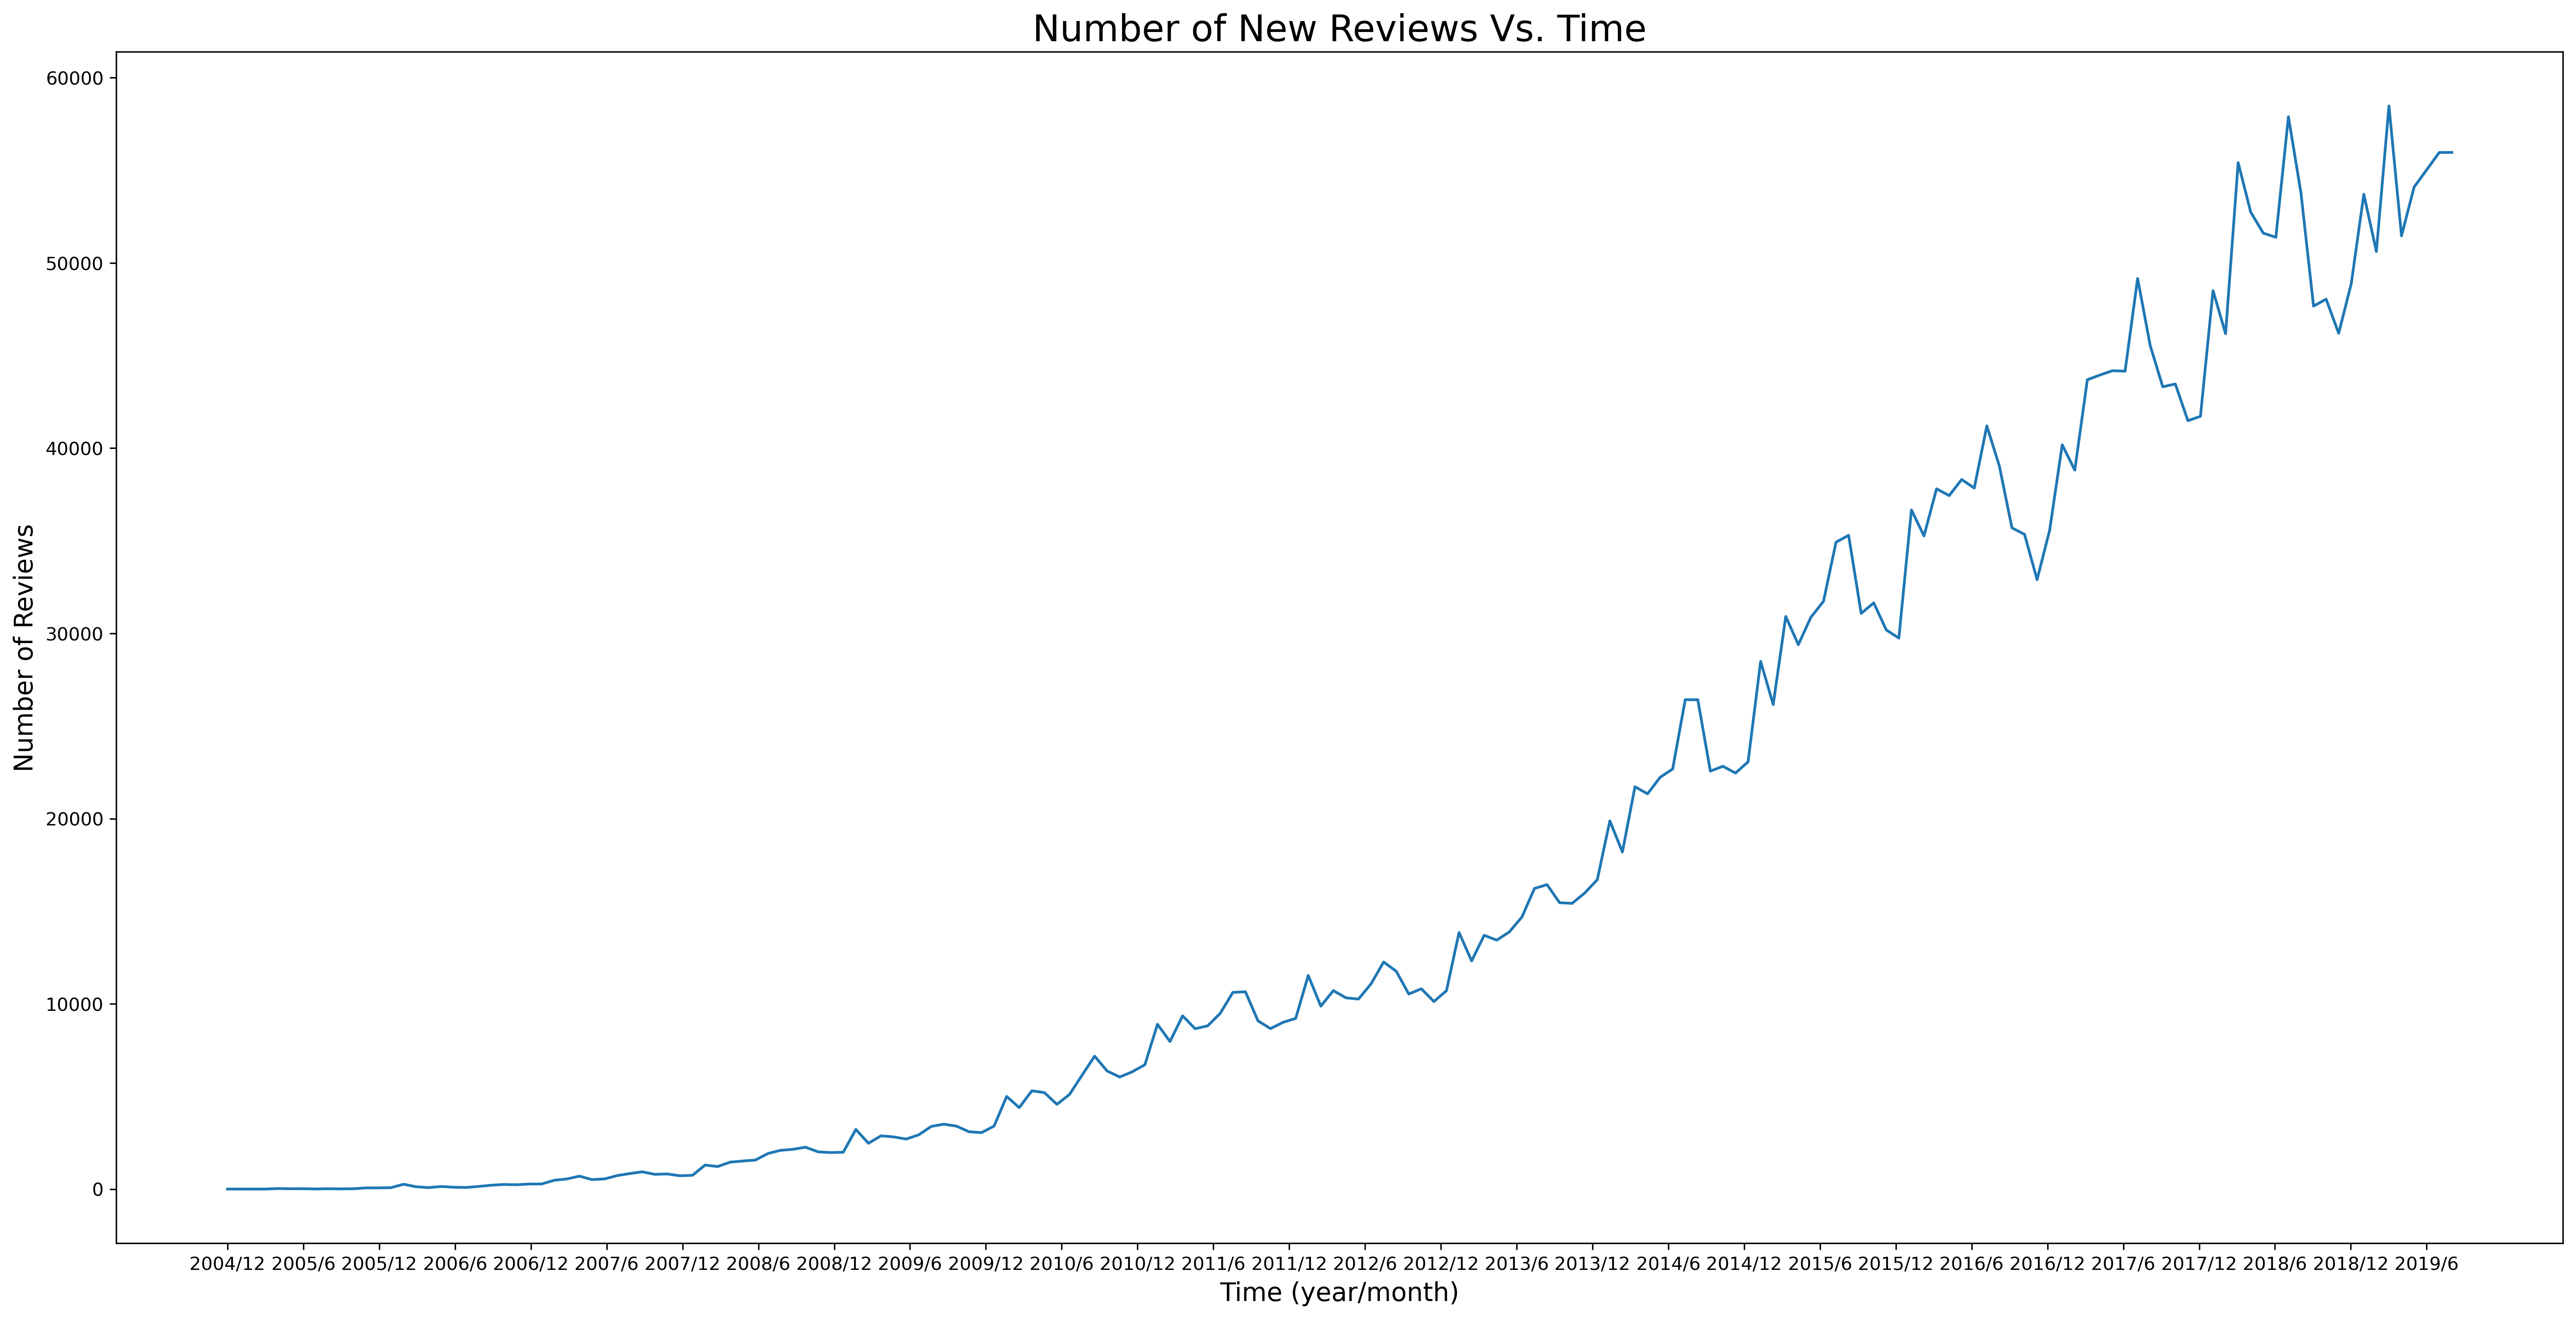

In [9]:
plt.figure(figsize=(24,12), dpi=300)
plt.plot(time_count[:-4])
plt.xticks(lll,tick, fontsize = 10)
plt.title('Number of New Reviews Vs. Time', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xlabel('Time (year/month)', fontsize=14)